In [1]:
# Speech Emotion Recognition With Convolutional Neural Network

# Content
1. Including Libraries
2. Including the Datasets
3. Data Analyze
     * Audio Augmentation
        * Original Audio
        * Noised Audio
        * Streched Audio
        * Shifted Audio
        * Pitched Audio
    * Feature Extraction
    * Processing
4. Including Analyzed Audio Features
5. Processing Analyzed Data for Training
    * Train, Test and Validation Spliting
    * Tuning for Training
6. Begin Training
7. Drawing Charts
    * Accuracy Charts
    * Loss Charts
8. Testing Model and Test Results
    * Confusion Matrix

<a id="1"></a>
# Including Libraries

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os


<a id="2"></a>
# Including the Datasets

In [3]:
Crema_Path="D:\data\Crema"
Ravdess_Path=r'D:\data\Ravdess\audio_speech_actors_01-24'
Savee_Path="D:\data\Savee"
Tess_Path="D:\data\Tess"





<a id="3"></a>
# Data Preprocessing

In [4]:
crema=[]
for wav in os.listdir(Crema_Path):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',Crema_Path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema_Path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema_Path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema_Path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema_Path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema_Path+'/'+wav))
    else:
        crema.append(('unknown',Crema_Path+'/'+wav))
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Crema_df.head()

Emotion                          File_Path
0    angry  D:\data\Crema/1001_DFA_ANG_XX.wav
1  disgust  D:\data\Crema/1001_DFA_DIS_XX.wav
2     fear  D:\data\Crema/1001_DFA_FEA_XX.wav
3    happy  D:\data\Crema/1001_DFA_HAP_XX.wav
4  neutral  D:\data\Crema/1001_DFA_NEU_XX.wav

In [5]:
Crema_df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad'],
      dtype=object)

In [6]:
ravdess=[]
for directory in os.listdir(Ravdess_Path):
    actors=os.listdir(os.path.join(Ravdess_Path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

Emotion                                          File_Path
0  neutral  D:\data\Ravdess\audio_speech_actors_01-24\Acto...
1  neutral  D:\data\Ravdess\audio_speech_actors_01-24\Acto...
2  neutral  D:\data\Ravdess\audio_speech_actors_01-24\Acto...
3  neutral  D:\data\Ravdess\audio_speech_actors_01-24\Acto...
4  neutral  D:\data\Ravdess\audio_speech_actors_01-24\Acto...

In [7]:
Ravdess_df['Emotion'].unique()

array(['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise'],
      dtype=object)

In [8]:
savee=[]
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',Savee_Path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',Savee_Path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',Savee_Path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',Savee_Path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',Savee_Path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',Savee_Path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',Savee_Path+'/'+wav))
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

Emotion                 File_Path
0   angry  D:\data\Savee/DC_a01.wav
1   angry  D:\data\Savee/DC_a02.wav
2   angry  D:\data\Savee/DC_a03.wav
3   angry  D:\data\Savee/DC_a04.wav
4   angry  D:\data\Savee/DC_a05.wav

In [9]:
Savee_df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [10]:
import os
import pandas as pd

# Assuming TESS is defined correctly
TESS = "D:\\data\\Tess"  # Ensure this is your correct path
dir_list = os.listdir(TESS)  # Automatically get directories

path = []
emotion = []

# Loop through each directory in dir_list
for i in dir_list:
    # Ensure you check for directories and not files
    if os.path.isdir(os.path.join(TESS, i)):
        # List all files in the directory
        fname = os.listdir(os.path.join(TESS, i))
        for f in fname:
            # Determine the emotion based on the directory name (case-sensitive)
            if i in ['OAF_angry', 'YAF_angry']:
                emotion.append('angry')
            elif i in ['OAF_disgust', 'YAF_disgust']:
                emotion.append('disgust')
            elif i in ['OAF_Fear', 'YAF_fear']:
                emotion.append('fear')
            elif i in ['OAF_happy', 'YAF_happy']:
                emotion.append('happy')
            elif i in ['OAF_neutral', 'YAF_neutral']:
                emotion.append('neutral')                                
            elif i in ['OAF_Pleasant_surprise', 'YAF_pleasant_surprised']:
                emotion.append('surprise')               
            elif i in ['OAF_Sad', 'YAF_sad']:
                emotion.append('sad')
            else:
                emotion.append('Unknown')
            
            # Construct the full path and append to the list
            full_path = os.path.join(TESS, i, f)  # Use os.path.join for compatibility
            path.append(full_path)

# Create DataFrame from the lists
TESS_df = pd.DataFrame(emotion, columns=['Emotion'])
TESS_df['File_Path'] = path  # Assign paths directly to the DataFrame

# Display the value counts of the labels (optional, to verify label distribution)
print(TESS_df['Emotion'].value_counts())

# Display the first few rows of the DataFrame
TESS_df.head()


angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Unknown      14
Name: Emotion, dtype: int64


Emotion                                  File_Path
0   angry  D:\data\Tess\OAF_angry\OAF_back_angry.wav
1   angry   D:\data\Tess\OAF_angry\OAF_bar_angry.wav
2   angry  D:\data\Tess\OAF_angry\OAF_base_angry.wav
3   angry  D:\data\Tess\OAF_angry\OAF_bath_angry.wav
4   angry  D:\data\Tess\OAF_angry\OAF_bean_angry.wav

In [11]:
print(TESS_df.shape)
TESS_df = TESS_df[TESS_df.Emotion != 'Unknown']
print(TESS_df.shape)
print(TESS_df.Emotion.value_counts())
TESS_df.head()


(2814, 2)
(2800, 2)
angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: Emotion, dtype: int64


Emotion                                  File_Path
0   angry  D:\data\Tess\OAF_angry\OAF_back_angry.wav
1   angry   D:\data\Tess\OAF_angry\OAF_bar_angry.wav
2   angry  D:\data\Tess\OAF_angry\OAF_base_angry.wav
3   angry  D:\data\Tess\OAF_angry\OAF_bath_angry.wav
4   angry  D:\data\Tess\OAF_angry\OAF_bean_angry.wav

In [12]:
TESS_df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad'],
      dtype=object)

<h1>creating maindf</h1> 

In [13]:
main_df=pd.concat([Crema_df,Ravdess_df,Savee_df,TESS_df],axis=0)
main_df.shape

(12162, 2)

In [14]:
main_df.head(15)

Emotion                          File_Path
0     angry  D:\data\Crema/1001_DFA_ANG_XX.wav
1   disgust  D:\data\Crema/1001_DFA_DIS_XX.wav
2      fear  D:\data\Crema/1001_DFA_FEA_XX.wav
3     happy  D:\data\Crema/1001_DFA_HAP_XX.wav
4   neutral  D:\data\Crema/1001_DFA_NEU_XX.wav
5       sad  D:\data\Crema/1001_DFA_SAD_XX.wav
6     angry  D:\data\Crema/1001_IEO_ANG_HI.wav
7     angry  D:\data\Crema/1001_IEO_ANG_LO.wav
8     angry  D:\data\Crema/1001_IEO_ANG_MD.wav
9   disgust  D:\data\Crema/1001_IEO_DIS_HI.wav
10  disgust  D:\data\Crema/1001_IEO_DIS_LO.wav
11  disgust  D:\data\Crema/1001_IEO_DIS_MD.wav
12     fear  D:\data\Crema/1001_IEO_FEA_HI.wav
13     fear  D:\data\Crema/1001_IEO_FEA_LO.wav
14     fear  D:\data\Crema/1001_IEO_FEA_MD.wav

In [15]:
main_df.tail(15)

Emotion                               File_Path
2799     sad   D:\data\Tess\YAF_sad\YAF_walk_sad.wav
2800     sad   D:\data\Tess\YAF_sad\YAF_wash_sad.wav
2801     sad   D:\data\Tess\YAF_sad\YAF_week_sad.wav
2802     sad  D:\data\Tess\YAF_sad\YAF_wheat_sad.wav
2803     sad   D:\data\Tess\YAF_sad\YAF_when_sad.wav
2804     sad  D:\data\Tess\YAF_sad\YAF_which_sad.wav
2805     sad   D:\data\Tess\YAF_sad\YAF_whip_sad.wav
2806     sad  D:\data\Tess\YAF_sad\YAF_white_sad.wav
2807     sad   D:\data\Tess\YAF_sad\YAF_wife_sad.wav
2808     sad   D:\data\Tess\YAF_sad\YAF_wire_sad.wav
2809     sad  D:\data\Tess\YAF_sad\YAF_witch_sad.wav
2810     sad  D:\data\Tess\YAF_sad\YAF_yearn_sad.wav
2811     sad    D:\data\Tess\YAF_sad\YAF_yes_sad.wav
2812     sad  D:\data\Tess\YAF_sad\YAF_young_sad.wav
2813     sad  D:\data\Tess\YAF_sad\YAF_youth_sad.wav

<h2>Emotion count</h2

In [16]:
main_df["Emotion"].value_counts()

angry       1923
disgust     1923
fear        1923
happy       1923
sad         1923
neutral     1895
surprise     652
Name: Emotion, dtype: int64

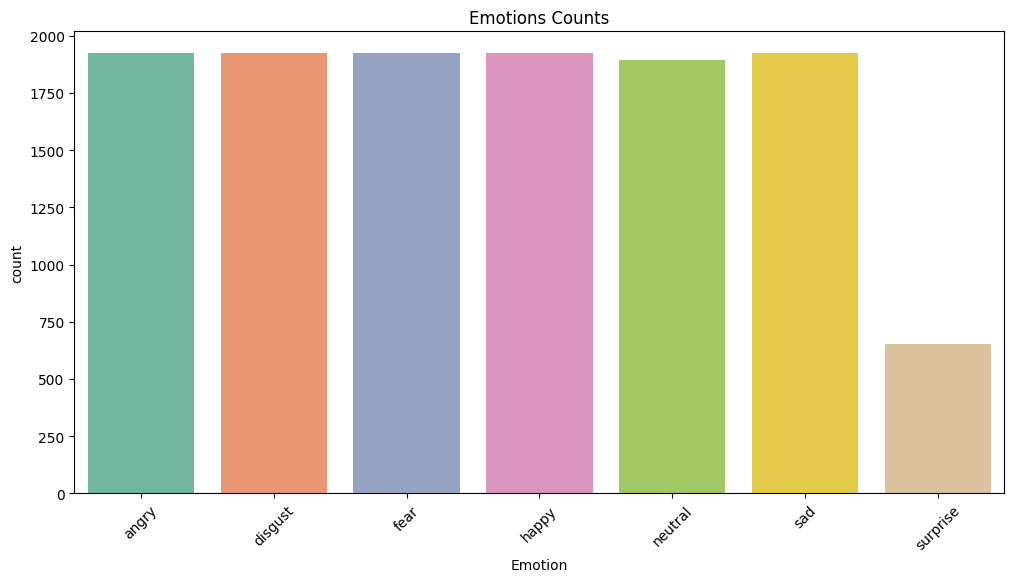

In [17]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [18]:
emotion_names=main_df['Emotion'].unique()

In [19]:
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

In [20]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

In [21]:
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

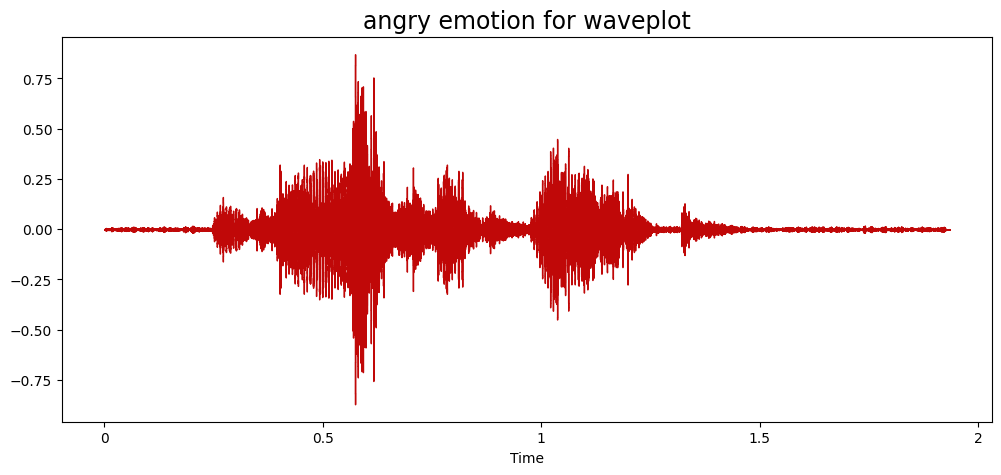

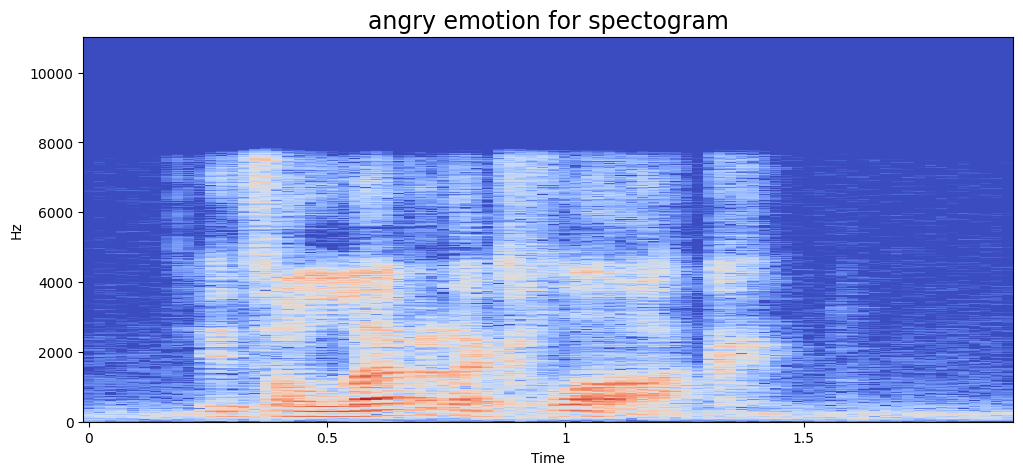

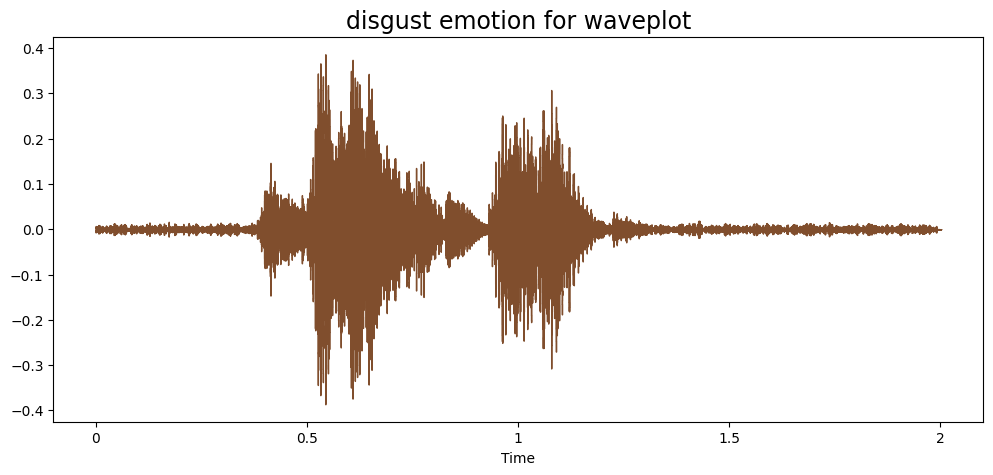

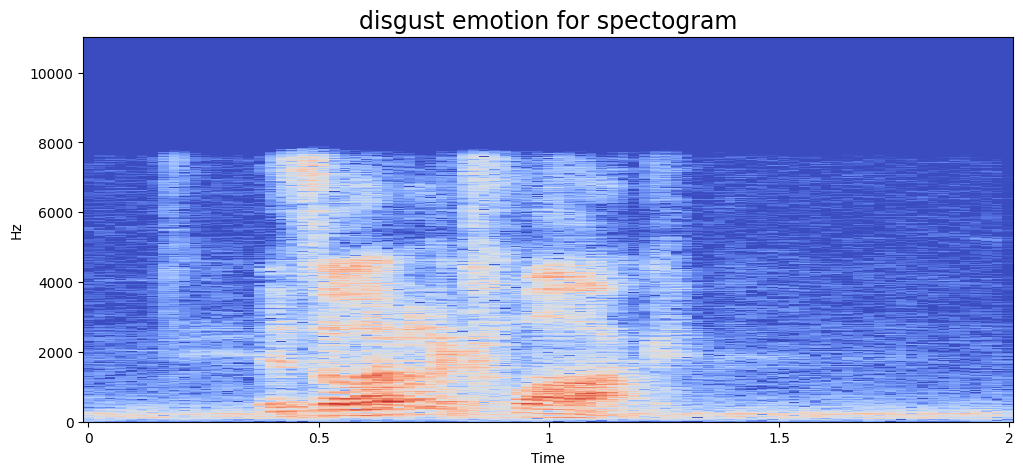

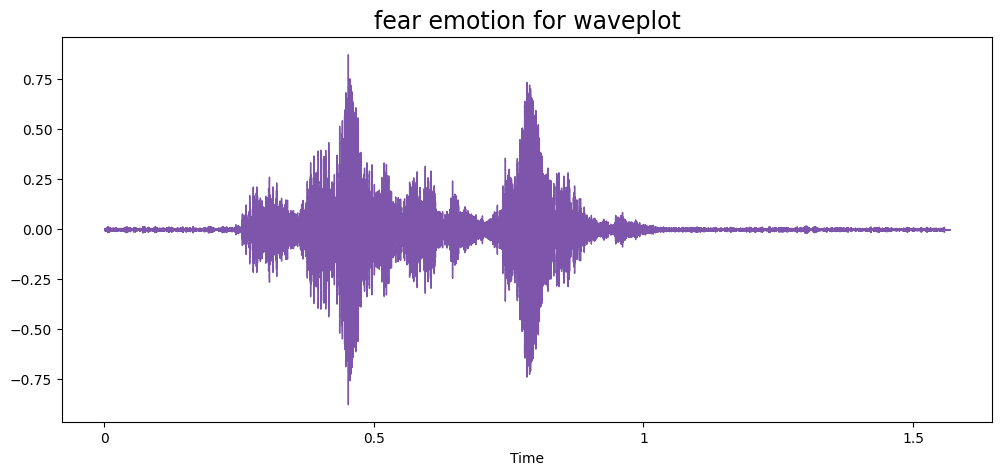

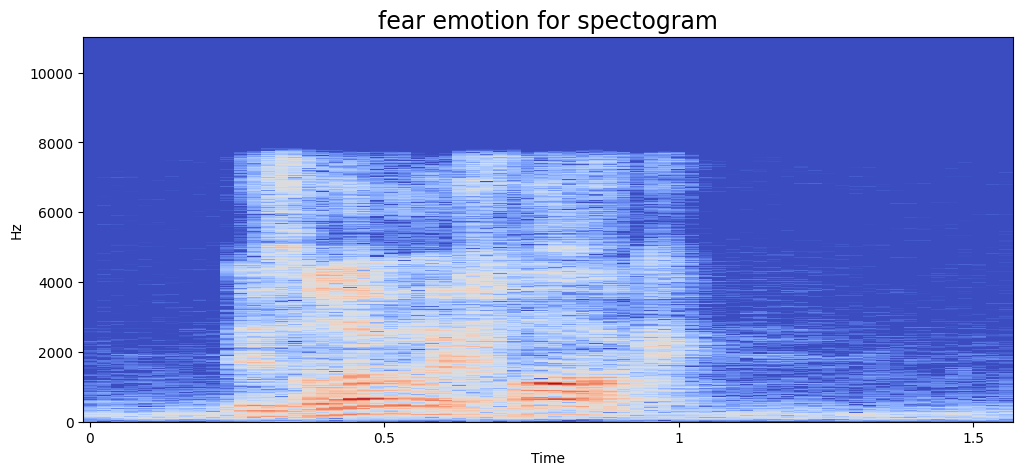

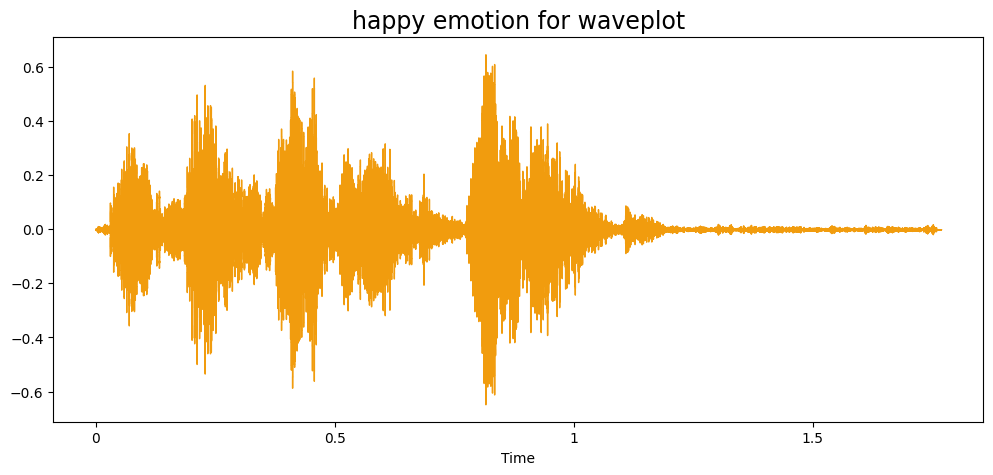

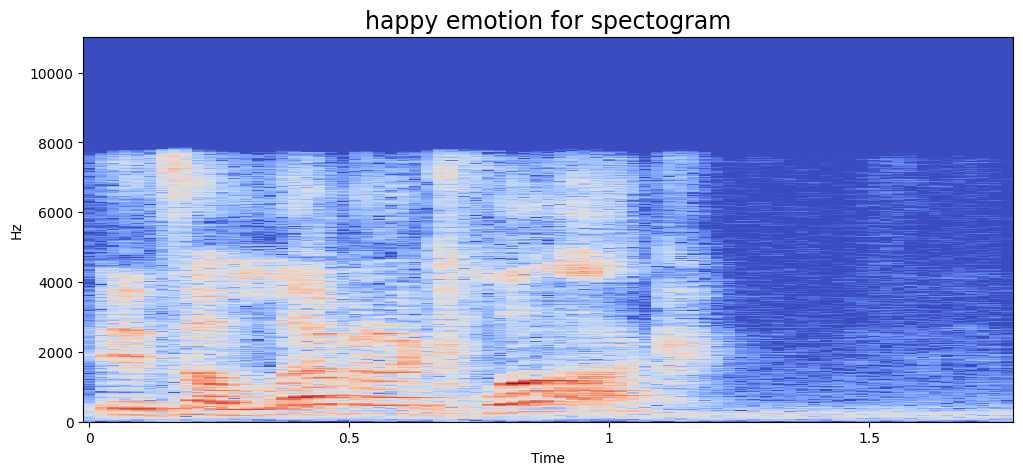

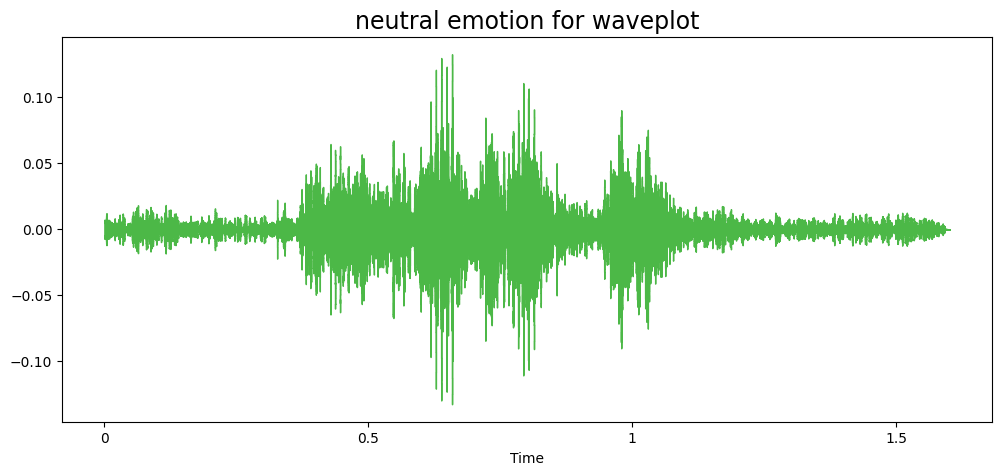

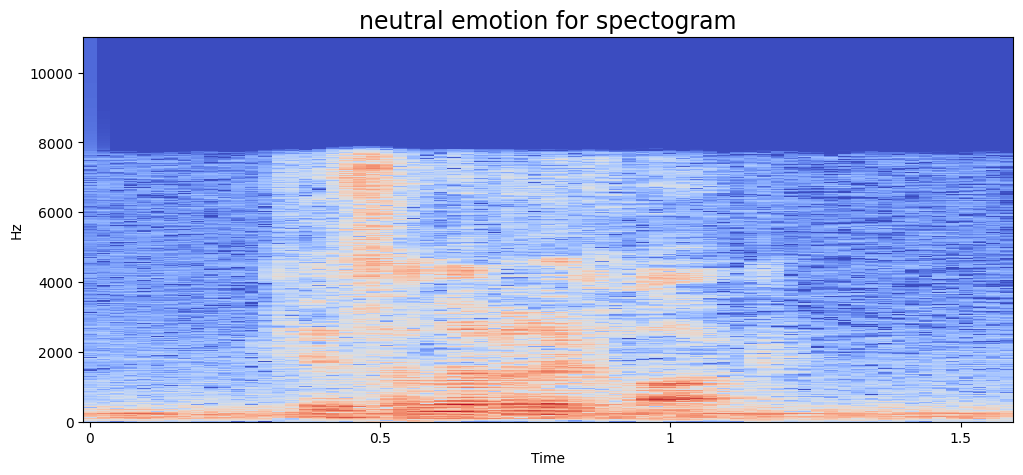

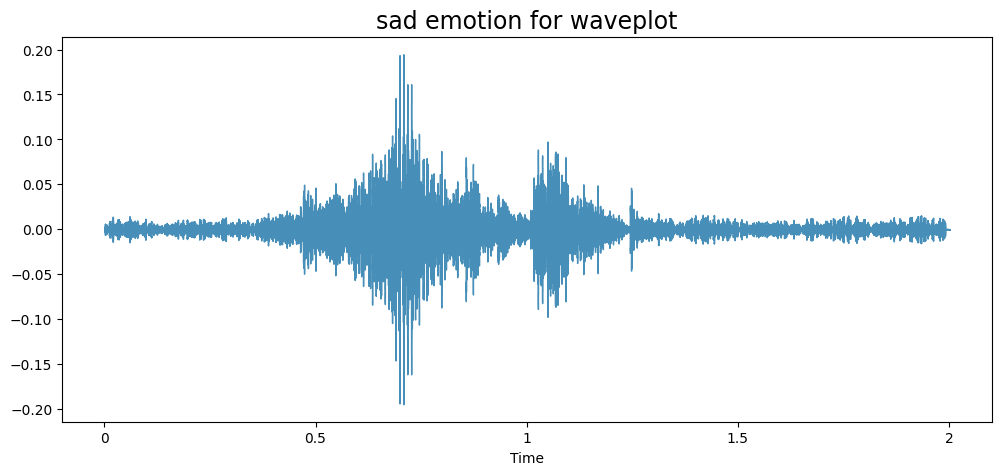

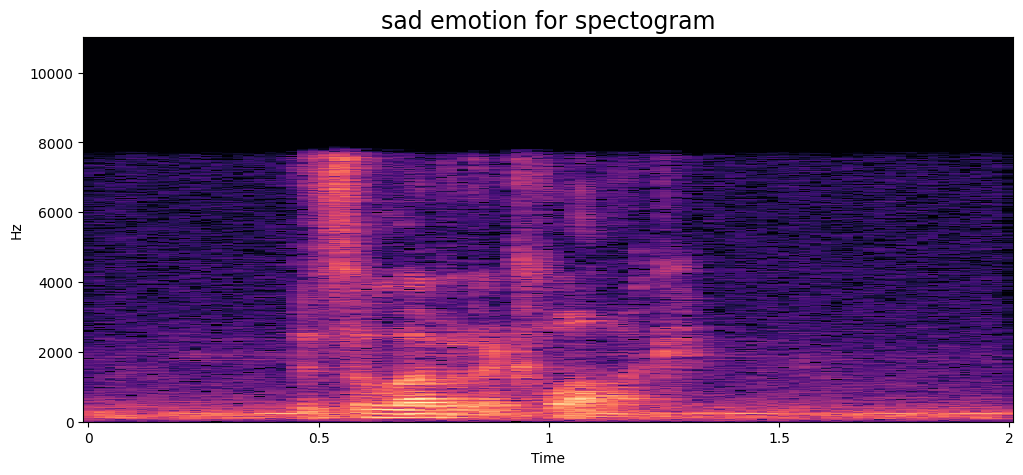

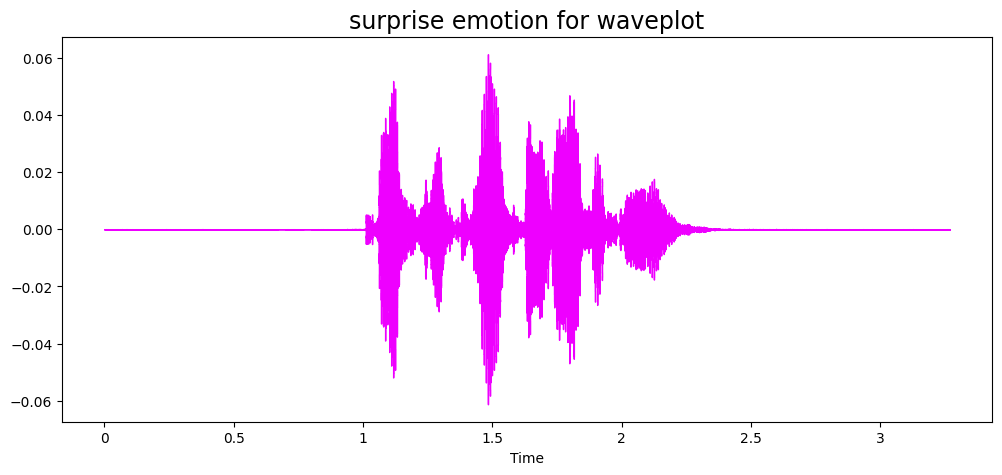

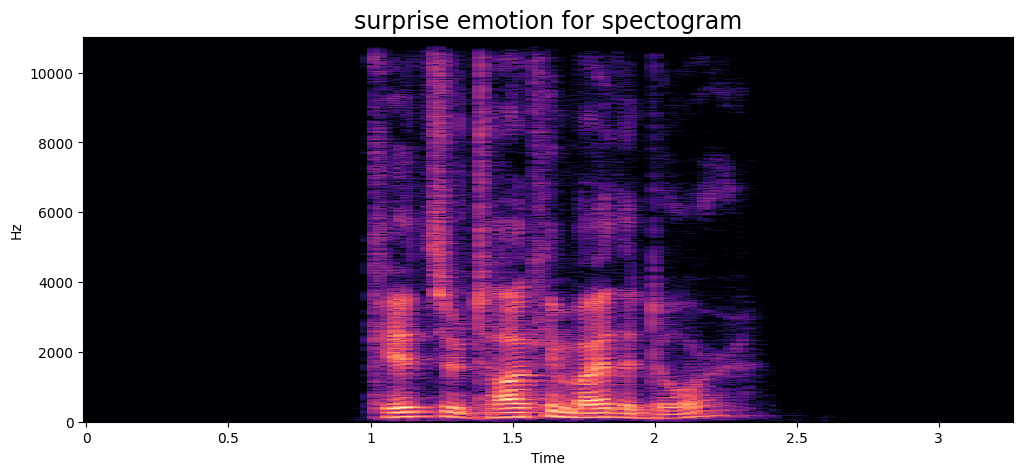

In [22]:
audio_path=[]
for emotion in emotion_names:
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)

In [23]:
print('Disgust Audio Sample\n')
IPython.display.Audio(audio_path[0])

Disgust Audio Sample



In [24]:
print('Happy Audio Sample\n')
IPython.display.Audio(audio_path[1])

Happy Audio Sample



In [25]:
print('Sad Audio Sample\n')
IPython.display.Audio(audio_path[2])

Sad Audio Sample



In [26]:
print('Neutral Audio Sample\n')
IPython.display.Audio(audio_path[3])

Neutral Audio Sample



In [27]:
print('Fear Audio Sample\n')
IPython.display.Audio(audio_path[4])

Fear Audio Sample



In [28]:
print('Angry Audio Sample\n')
IPython.display.Audio(audio_path[5])

Angry Audio Sample



In [29]:
print('Surprise Audio Sample\n')
IPython.display.Audio(audio_path[6])

Surprise Audio Sample



<a id="7"></a>
## Audio Augmentation

In [30]:
def add_noise(data,random=False,rate=0.035,threshold=0.075):
    if random:
        rate=np.random.random()*threshold
    noise=rate*np.random.uniform()*np.amax(data)
    augmented_data=data+noise*np.random.normal(size=data.shape[0])
    return augmented_data

def shifting(data,rate=1000):
    augmented_data=int(np.random.uniform(low=-5,high=5)*rate)
    augmented_data=np.roll(data,augmented_data)
    return augmented_data

def pitching(data, sr, pitch_factor=0.7, random=False):
    if random:
        pitch_factor = np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(y=data, sr=sr, n_steps=pitch_factor)

def streching(data,rate=0.8):
    return librosa.effects.time_stretch(data,rate=0.8)
    

In [31]:
data,sr=librosa.load(audio_path[6])

<a id="4"></a>
### Original Audio

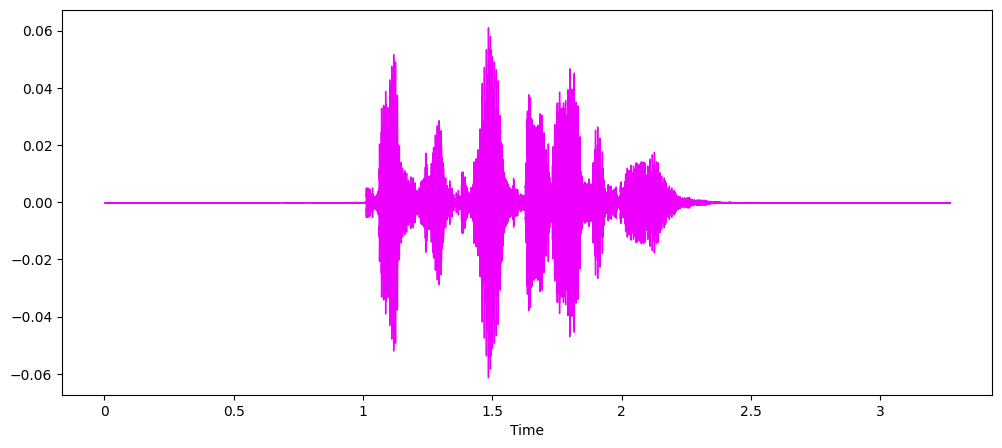

In [32]:
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr, color='#EE00FF')
IPython.display.Audio(audio_path[6])


<a id="8"></a>
### Noised Audio

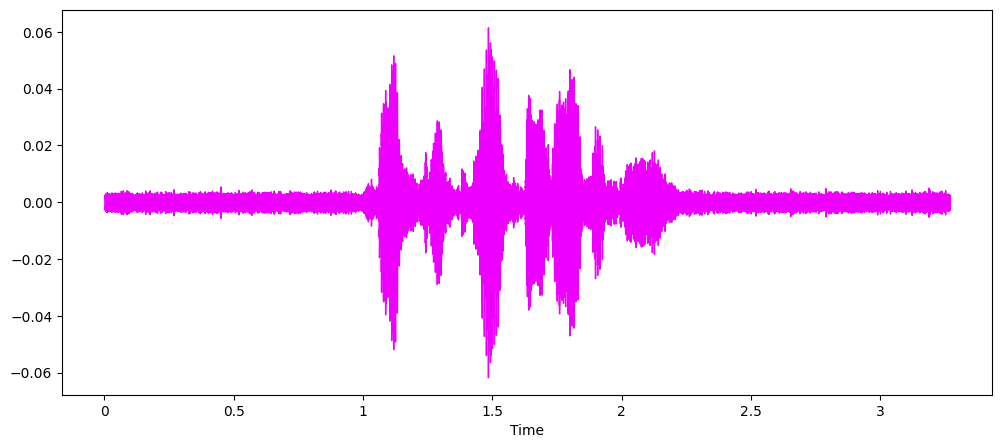

In [33]:

noised_audio = add_noise(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=noised_audio, sr=sr, color='#EE00FF')
IPython.display.Audio(noised_audio, rate=sr)


<a id="10"></a>
### Streched Audio

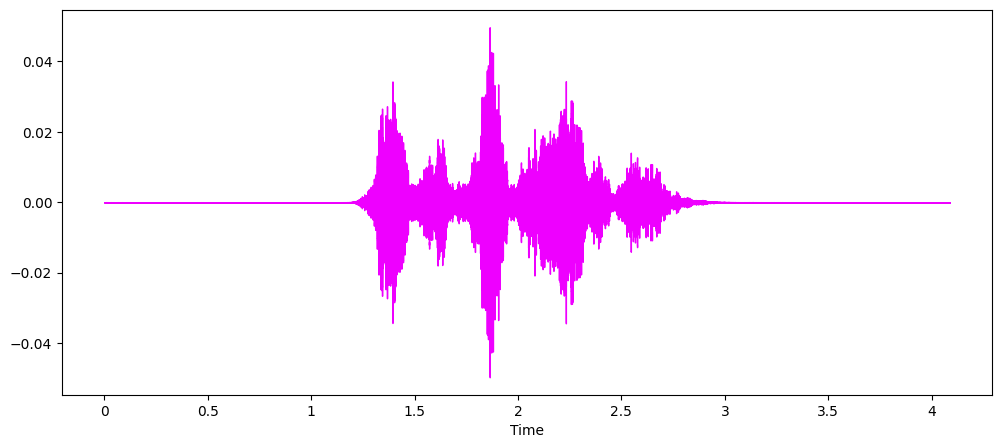

In [34]:
stretched_audio = streching(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=stretched_audio, sr=sr, color='#EE00FF')
IPython.display.Audio(stretched_audio, rate=sr)


<a id="11"></a>
### Shifted Audio

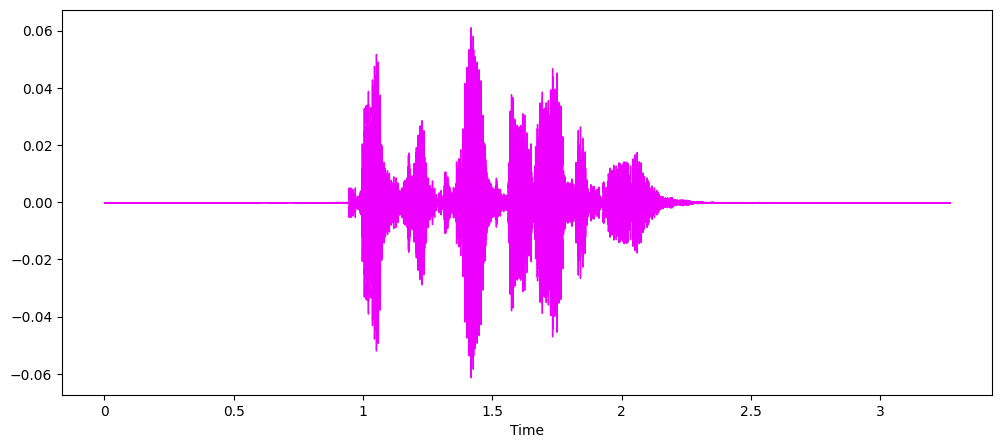

In [35]:
shifted_audio = shifting(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=shifted_audio, sr=sr, color='#EE00FF')
IPython.display.Audio(shifted_audio, rate=sr)


<a id="12"></a>
### Pitched Audio

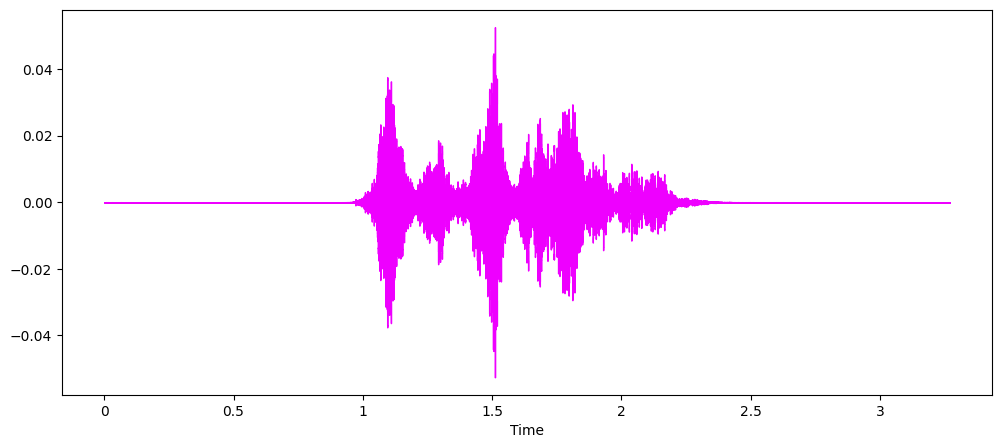

In [36]:
pitched_audio = pitching(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=pitched_audio, sr=sr, color='#EE00FF')
IPython.display.Audio(pitched_audio, rate=sr)


<a id="13"></a>
## Feature Extraction

In [37]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data,sr)
    audio=np.array(aud)
    
    noised_audio=add_noise(data,random=True)
    aud2=extract_features(noised_audio,sr)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitching(data,sr,random=True)
    aud3=extract_features(pitched_audio,sr)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitching(data,sr,random=True)
    pitched_noised_audio=add_noise(pitched_audio1,random=True)
    aud4=extract_features(pitched_noised_audio,sr)
    audio=np.vstack((audio,aud4))
    
    return audio

<a id="14"></a>
## Processing

In [38]:
X,Y=[],[]
for path,emotion,index in zip(main_df.File_Path,main_df.Emotion,range(main_df.File_Path.shape[0])):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')

0 audio has been processed
500 audio has been processed
1000 audio has been processed
1500 audio has been processed
2000 audio has been processed
2500 audio has been processed
3000 audio has been processed
3500 audio has been processed
4000 audio has been processed
4500 audio has been processed
5000 audio has been processed
5500 audio has been processed
6000 audio has been processed
6500 audio has been processed
7000 audio has been processed
7500 audio has been processed
8000 audio has been processed
8500 audio has been processed
9000 audio has been processed
9500 audio has been processed
10000 audio has been processed
10500 audio has been processed
11000 audio has been processed
11500 audio has been processed
12000 audio has been processed
Done


In [39]:
processed_data_path='./processed_data.csv'

In [40]:
extract=pd.DataFrame(X)
extract['Emotion']=Y
extract.to_csv(processed_data_path,index=False)
extract.head(10)

0         1         2         3         4         5         6  \
0  0.034180  0.069336  0.115723  0.148926  0.142090  0.130859  0.101562   
1  0.031250  0.067383  0.115723  0.149902  0.145996  0.133789  0.101562   
2  0.037109  0.073242  0.119629  0.132812  0.126465  0.113770  0.083984   
3  0.039062  0.082031  0.125977  0.140137  0.135254  0.113281  0.085449   
4  0.041504  0.059082  0.070312  0.062988  0.080566  0.128906  0.145508   
5  0.043457  0.061035  0.072266  0.063965  0.088867  0.139648  0.162109   
6  0.040527  0.057129  0.069824  0.064941  0.087402  0.115234  0.125977   
7  0.041016  0.060547  0.074219  0.067871  0.096191  0.126465  0.141602   
8  0.052734  0.069336  0.087402  0.068848  0.076660  0.075684  0.077637   
9  0.058594  0.077148  0.109863  0.109863  0.133301  0.144043  0.139160   

          7         8         9  ...  2367  2368  2369  2370  2371  2372  \
0  0.070801  0.069336  0.074219  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1  0.069824  0.068359  0.073242  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2  0.074219  0.066895  0.068848  ...   NaN   NaN   NaN   NaN   NaN   NaN   
3  0.073730  0.067871  0.074707  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4  0.146484  0.125977  0.072266  ...   NaN   NaN   NaN   NaN   NaN   NaN   
5  0.165039  0.139648  0.086426  ...   NaN   NaN   NaN   NaN   NaN   NaN   
6  0.125488  0.103516  0.070801  ...   NaN   NaN   NaN   NaN   NaN   NaN   
7  0.141602  0.118164  0.089355  ...   NaN   NaN   NaN   NaN   NaN   NaN   
8  0.078613  0.072266  0.084961  ...   NaN   NaN   NaN   NaN   NaN   NaN   
9  0.126465  0.111816  0.119141  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   2373  2374  2375  Emotion  
0   NaN   NaN   NaN    angry  
1   NaN   NaN   NaN    angry  
2   NaN   NaN   NaN    angry  
3   NaN   NaN   NaN    angry  
4   NaN   NaN   NaN  disgust  
5   NaN   NaN   NaN  disgust  
6   NaN   NaN   NaN  disgust  
7   NaN   NaN   NaN  disgust  
8   NaN   NaN   NaN     fear  
9   NaN   NaN   NaN     fear  

[10 rows x 2377 columns]

<a id="15"></a>
# Including Analyzed Audio Features

In [41]:
df=pd.read_csv(processed_data_path)
df.shape

(48648, 2377)

In [42]:
df=df.fillna(0)
print(df.isna().any())
df.shape

0          False
1          False
2          False
3          False
4          False
           ...  
2372       False
2373       False
2374       False
2375       False
Emotion    False
Length: 2377, dtype: bool


(48648, 2377)

In [43]:
df.head(10)

0         1         2         3         4         5         6  \
0  0.034180  0.069336  0.115723  0.148926  0.142090  0.130859  0.101562   
1  0.031250  0.067383  0.115723  0.149902  0.145996  0.133789  0.101562   
2  0.037109  0.073242  0.119629  0.132812  0.126465  0.113770  0.083984   
3  0.039062  0.082031  0.125977  0.140137  0.135254  0.113281  0.085449   
4  0.041504  0.059082  0.070312  0.062988  0.080566  0.128906  0.145508   
5  0.043457  0.061035  0.072266  0.063965  0.088867  0.139648  0.162109   
6  0.040527  0.057129  0.069824  0.064941  0.087402  0.115234  0.125977   
7  0.041016  0.060547  0.074219  0.067871  0.096191  0.126465  0.141602   
8  0.052734  0.069336  0.087402  0.068848  0.076660  0.075684  0.077637   
9  0.058594  0.077148  0.109863  0.109863  0.133301  0.144043  0.139160   

          7         8         9  ...  2367  2368  2369  2370  2371  2372  \
0  0.070801  0.069336  0.074219  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1  0.069824  0.068359  0.073242  ...   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.074219  0.066895  0.068848  ...   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.073730  0.067871  0.074707  ...   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.146484  0.125977  0.072266  ...   0.0   0.0   0.0   0.0   0.0   0.0   
5  0.165039  0.139648  0.086426  ...   0.0   0.0   0.0   0.0   0.0   0.0   
6  0.125488  0.103516  0.070801  ...   0.0   0.0   0.0   0.0   0.0   0.0   
7  0.141602  0.118164  0.089355  ...   0.0   0.0   0.0   0.0   0.0   0.0   
8  0.078613  0.072266  0.084961  ...   0.0   0.0   0.0   0.0   0.0   0.0   
9  0.126465  0.111816  0.119141  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   2373  2374  2375  Emotion  
0   0.0   0.0   0.0    angry  
1   0.0   0.0   0.0    angry  
2   0.0   0.0   0.0    angry  
3   0.0   0.0   0.0    angry  
4   0.0   0.0   0.0  disgust  
5   0.0   0.0   0.0  disgust  
6   0.0   0.0   0.0  disgust  
7   0.0   0.0   0.0  disgust  
8   0.0   0.0   0.0     fear  
9   0.0   0.0   0.0     fear  

[10 rows x 2377 columns]

<a id="16"></a>
# Processing Analyzed Data for Training

In [81]:
X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

In [82]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
Y = to_categorical(lb.fit_transform(Y))
print(lb.classes_)
print(Y)
for index, y in enumerate(lb.classes_):
    print(f"{y} is mapped to {index}")



['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
angry is mapped to 0
disgust is mapped to 1
fear is mapped to 2
happy is mapped to 3
neutral is mapped to 4
sad is mapped to 5
surprise is mapped to 6


<a id="17"></a>
## Train, Test and Validation Spliting

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((38918, 2376), (9730, 2376), (38918, 7), (9730, 7))

validation_split

In [47]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((35026, 2376), (9730, 2376), (3892, 2376), (35026, 7), (9730, 7), (3892, 7))

In [48]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((35026, 2376), (9730, 2376), (3892, 2376), (35026, 7), (9730, 7), (3892, 7))

In [49]:
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((35026, 2376, 1), (9730, 2376, 1), (3892, 2376, 1))

<a id="18"></a>
## Tuning for Training

In [50]:
early_stop=EarlyStopping(monitor='val_accuracy',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [51]:
EPOCH=15
BATCH_SIZE=64

<a id="19"></a>
# Begin Training

In [52]:
model=tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 2376, 512)           │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2376, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1188, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1188, 512)           │       1,311,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1188, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 594, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 594, 256)            │         655,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 594, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 297, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 297, 256)            │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 297, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 149, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 149, 128)            │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 149, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 75, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,915,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,193,223 (27.44 MB)

 Trainable params: 7,188,871 (27.42 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [53]:
history=model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val,y_val), batch_size=BATCH_SIZE,callbacks=[early_stop,lr_reduction])

Epoch 1/15
548/548 ━━━━━━━━━━━━━━━━━━━━ 5867s 11s/step - accuracy: 0.4117 - loss: 1.6649 - val_accuracy: 0.4458 - val_loss: 1.5034 - learning_rate: 0.0010
Epoch 2/15
548/548 ━━━━━━━━━━━━━━━━━━━━ 5784s 11s/step - accuracy: 0.5697 - loss: 1.1149 - val_accuracy: 0.5632 - val_loss: 1.1120 - learning_rate: 0.0010
Epoch 3/15
548/548 ━━━━━━━━━━━━━━━━━━━━ 5868s 11s/step - accuracy: 0.6289 - loss: 0.9693 - val_accuracy: 0.5976 - val_loss: 1.0380 - learning_rate: 0.0010
Epoch 4/15
548/548 ━━━━━━━━━━━━━━━━━━━━ 5843s 11s/step - accuracy: 0.6793 - loss: 0.8364 - val_accuracy: 0.6310 - val_loss: 0.9904 - learning_rate: 0.0010
Epoch 5/15
548/548 ━━━━━━━━━━━━━━━━━━━━ 5741s 10s/step - accuracy: 0.7340 - loss: 0.7114 - val_accuracy: 0.6840 - val_loss: 0.8468 - learning_rate: 0.0010
Epoch 6/15
548/548 ━━━━━━━━━━━━━━━━━━━━ 5731s 10s/step - accuracy: 0.7993 - loss: 0.5517 - val_accuracy: 0.7012 - val_loss: 0.8394 - learning_rate: 0.0010
Epoch 7/15
548/548 ━━━━━━━━━━━━━━━━━━━━ 5727s 10s/step - accuracy: 0.8

<a id="20"></a>
# Drawing Charts

<a id="21"></a>
## Accuracy Charts

In [54]:
fig=px.line(history.history,y=['accuracy','val_accuracy'],
           labels={'index':'epoch','value':'accuracy'},
           title=f'According to the epoch accuracy and validation accuracy chart for the model')
fig.show()

<a id="22"></a>
## Loss Charts

In [55]:
fig=px.line(history.history,y=['loss','val_loss'],
           labels={'index':'epoch','value':'loss'},
           title=f'According to the epoch loss and validation loss chart for the model')
fig.show()

<a id="24"></a>
# Testing Model and Test Results

In [56]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

305/305 ━━━━━━━━━━━━━━━━━━━━ 287s 939ms/step


array([0, 5, 5, ..., 4, 4, 5], dtype=int64)

In [57]:
y_check=np.argmax(y_test,axis=1)
y_check

array([0, 5, 2, ..., 4, 4, 5], dtype=int64)

In [58]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.30434709787368774
Test Accuracy: 0.905652642250061


<a id="25"></a>
## Confusion Matrix

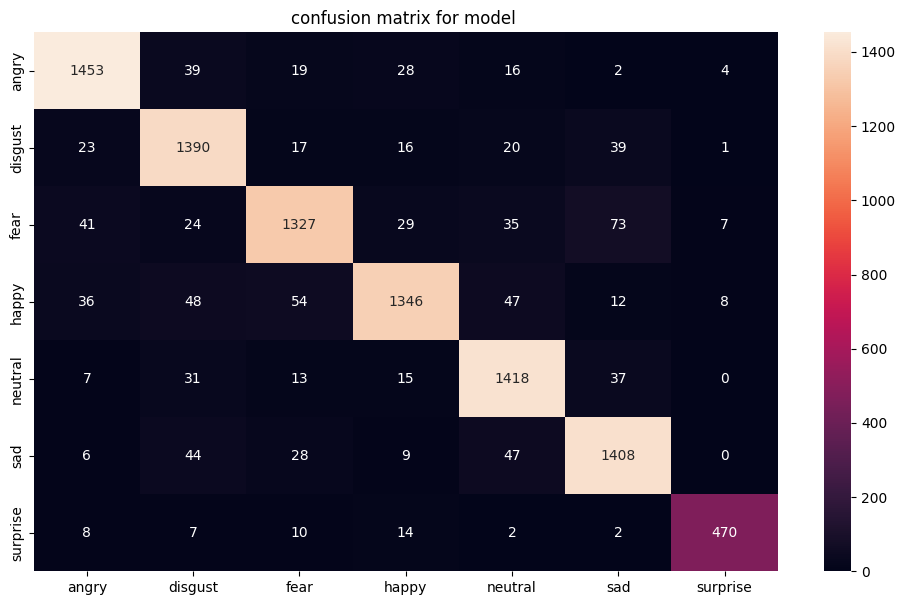

In [59]:
conf=confusion_matrix(y_check,y_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for model ')
plt.show()

In [60]:
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

       angry       0.92      0.93      0.93      1561
     disgust       0.88      0.92      0.90      1506
        fear       0.90      0.86      0.88      1536
       happy       0.92      0.87      0.89      1551
     neutral       0.89      0.93      0.91      1521
         sad       0.90      0.91      0.90      1542
    surprise       0.96      0.92      0.94       513

    accuracy                           0.91      9730
   macro avg       0.91      0.91      0.91      9730
weighted avg       0.91      0.91      0.91      9730



In [62]:
import pickle
filename = 'labels.pkl'  # Add .pkl extension for clarity
with open(filename, 'wb') as outfile:
    pickle.dump(lb, outfile)

print("LabelEncoder object has been saved.")

LabelEncoder object has been saved.


In [87]:
label=lb.inverse_transform(y_pred)
label

array(['angry', 'sad', 'sad', ..., 'neutral', 'neutral', 'sad'],
      dtype=object)

In [88]:
label1=lb.inverse_transform(y_check)
label1

array(['angry', 'sad', 'fear', ..., 'neutral', 'neutral', 'sad'],
      dtype=object)

In [86]:
checked = pd.DataFrame({'y_pred':label,"_check":label1})
checked[1:10]

y_pred   _check
1      sad      sad
2      sad     fear
3      sad      sad
4  disgust    angry
5    happy    happy
6    happy  neutral
7     fear     fear
8    happy    happy
9      sad      sad

In [89]:
# Save the trained scaler to a file using pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

<h2>model Saving </h2>

In [90]:
model_path = "./emotion_stream.h5"

model.save(model_path)

In [112]:
X_train.shape[1],1

(2376, 1)

In [144]:
import numpy as np
import librosa
import pickle
from tensorflow.keras.models import load_model
import os
from sklearn.preprocessing import StandardScaler

# Define noise and pitch augmentation functions
def add_noise(signal, noise_factor=0.005, random=False):
    if random:
        noise = np.random.randn(len(signal))
        return signal + noise_factor * noise
    return signal

def pitching(signal, sr, pitch_factor=0.5, random=False):
    if random:
        n_steps = np.random.uniform(-pitch_factor, pitch_factor)
        return librosa.effects.pitch_shift(signal, sr=sr, n_steps=n_steps)
    return signal

# Feature extraction functions
def zcr(data, frame_length, hop_length):
    zcr = librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

def extract_features(data, sr, frame_length=2048, hop_length=512):
    result = np.array([])

    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        rmse(data, frame_length, hop_length),
                        mfcc(data, sr, frame_length, hop_length)))
    return result

def get_features(path, duration=2.5, offset=0.6):
    data, sr = librosa.load(path, duration=duration, offset=offset)
    audio = extract_features(data, sr)
    audio = np.array(audio)

    # Extract features for augmented data
    audio_list = [audio]

    # Add noise
    noised_audio = add_noise(data, random=True)
    aud2 = extract_features(noised_audio, sr)
    audio_list.append(aud2)

    # Pitch modification
    pitched_audio = pitching(data, sr, random=True)
    aud3 = extract_features(pitched_audio, sr)
    audio_list.append(aud3)

    # Pitch modification with noise
    pitched_audio1 = pitching(data, sr, random=True)
    pitched_noised_audio = add_noise(pitched_audio1, random=True)
    aud4 = extract_features(pitched_noised_audio, sr)
    audio_list.append(aud4)

    # Stack all features and ensure correct shape
    return np.vstack(audio_list)

# Load your trained model (adjust the path as necessary)
model = load_model('emotion_stream.h5')

# Load the LabelEncoder object from the pickle file
with open('labels.pkl', 'rb') as infile:
    lb = pickle.load(infile)

print("LabelEncoder object has been loaded.")

# Path to your real-world audio file
audio_path =r"D:\data\Crema\1001_DFA_FEA_XX.wav"# Update with your audio file path

if not os.path.exists(audio_path):
    raise FileNotFoundError(f"Audio file not found: {audio_path}")

# Extract features from the real-world audio
X_real_data = get_features(audio_path)

# Print the shape of extracted features
print("Extracted features shape:", X_real_data.shape)

# Ensure the number of features matches 2376 (by padding if needed)
if X_real_data.shape[1] < 2376:
    X_real_data = np.pad(X_real_data, ((0, 0), (0, 2376 - X_real_data.shape[1])), mode='constant')
elif X_real_data.shape[1] > 2376:
    X_real_data = X_real_data[:, :2376]  # Truncate if too many features

# Load the StandardScaler that was fitted during training
with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Scale the features using the previously fitted scaler
X_real_data_scaled = scaler.transform(X_real_data)

# Reshape the data for model input
X_real_data_scaled = X_real_data_scaled.reshape(-1, 2376, 1)

# Make predictions for the real-world data
y_pred_real = model.predict(X_real_data_scaled)

# Print the shape of predictions
print("Predictions shape:", y_pred_real.shape)

from scipy.stats import mode

# Convert predictions to class indices
predicted_indices = np.argmax(y_pred_real, axis=1)  # Shape will be (num_samples,)

# Get the most common predicted class (emotion)
final_prediction_index = mode(predicted_indices).mode[0]  # This gets the mode of the predictions
final_prediction_emotion = lb.inverse_transform([final_prediction_index])  # Convert back to original label

print(final_prediction_emotion)


LabelEncoder object has been loaded.
Extracted features shape: (4, 1496)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
Predictions shape: (4, 7)
['fear']
